# Employee Attrition Prediction

### Step-by-Step Procedure

I.	Exploratory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set

II.	Feature engineering


III.	Modeling

    III.1. Models and metrics selection

    III.2. Hyperparameters tuning and model optimization
        III.2.1. Logistic regression
        III.2.2. DecisionTree Classifier
        III.2.3. XGBoost Classifier
        III.2.4. RandomForest Classifier

    III.3. Choosing the best model

IV. Prediction

# I. Exploratory Data Analysis

## I.1. General Exploration / Data Inspection

### 1.1. Importing necessary packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

### 1.2. Loading the data sets

In [2]:
data = pd.read_csv("C:/Users/ayush/Downloads/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data.shape)
data.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 1.3. Inspecting the data

In [3]:
# Checking if missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Checking Data distribution.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
# Checking number of unique values in each columns
count = 1
for x in data:
    print(f'{count}. {x}: {data[x].nunique()}')
    print(f'{data[x].value_counts()}', end = '\n----------\n\n' )    
    count += 1

1. Age: 43
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
----------

2. Attrition: 2
No     1233
Yes     237
Name: Attrition, dtype: int64
----------

3. BusinessTravel: 3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------

4. DailyRate: 886
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64
----------

5. Department: 3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------

6. Di

Things to be noted from above result:
1. There is imbalance in the data. (In Y-variable, one of the class have very high number than the other.)
2. EmployeeCount, Over18 and StandardHours are constant variable(All the values in the columns are same) and needed to be dropped.
3. EmployeeNumber is a unique variable(All the values in the columns are completely different/ Primary key) and needed to be dropped.

In [6]:
# Dropping unnecessary columns.
data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace = True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


## I.2. Numerical Features / Continuous variable

### 1.2.1. Exploring and Cleaning the continuous features

#### 1.2.1.1. Extracting Numerical features

In [8]:
cont_data = data.select_dtypes(exclude = ['object'] )
cont_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


#### 1.2.1.2. Data distribution

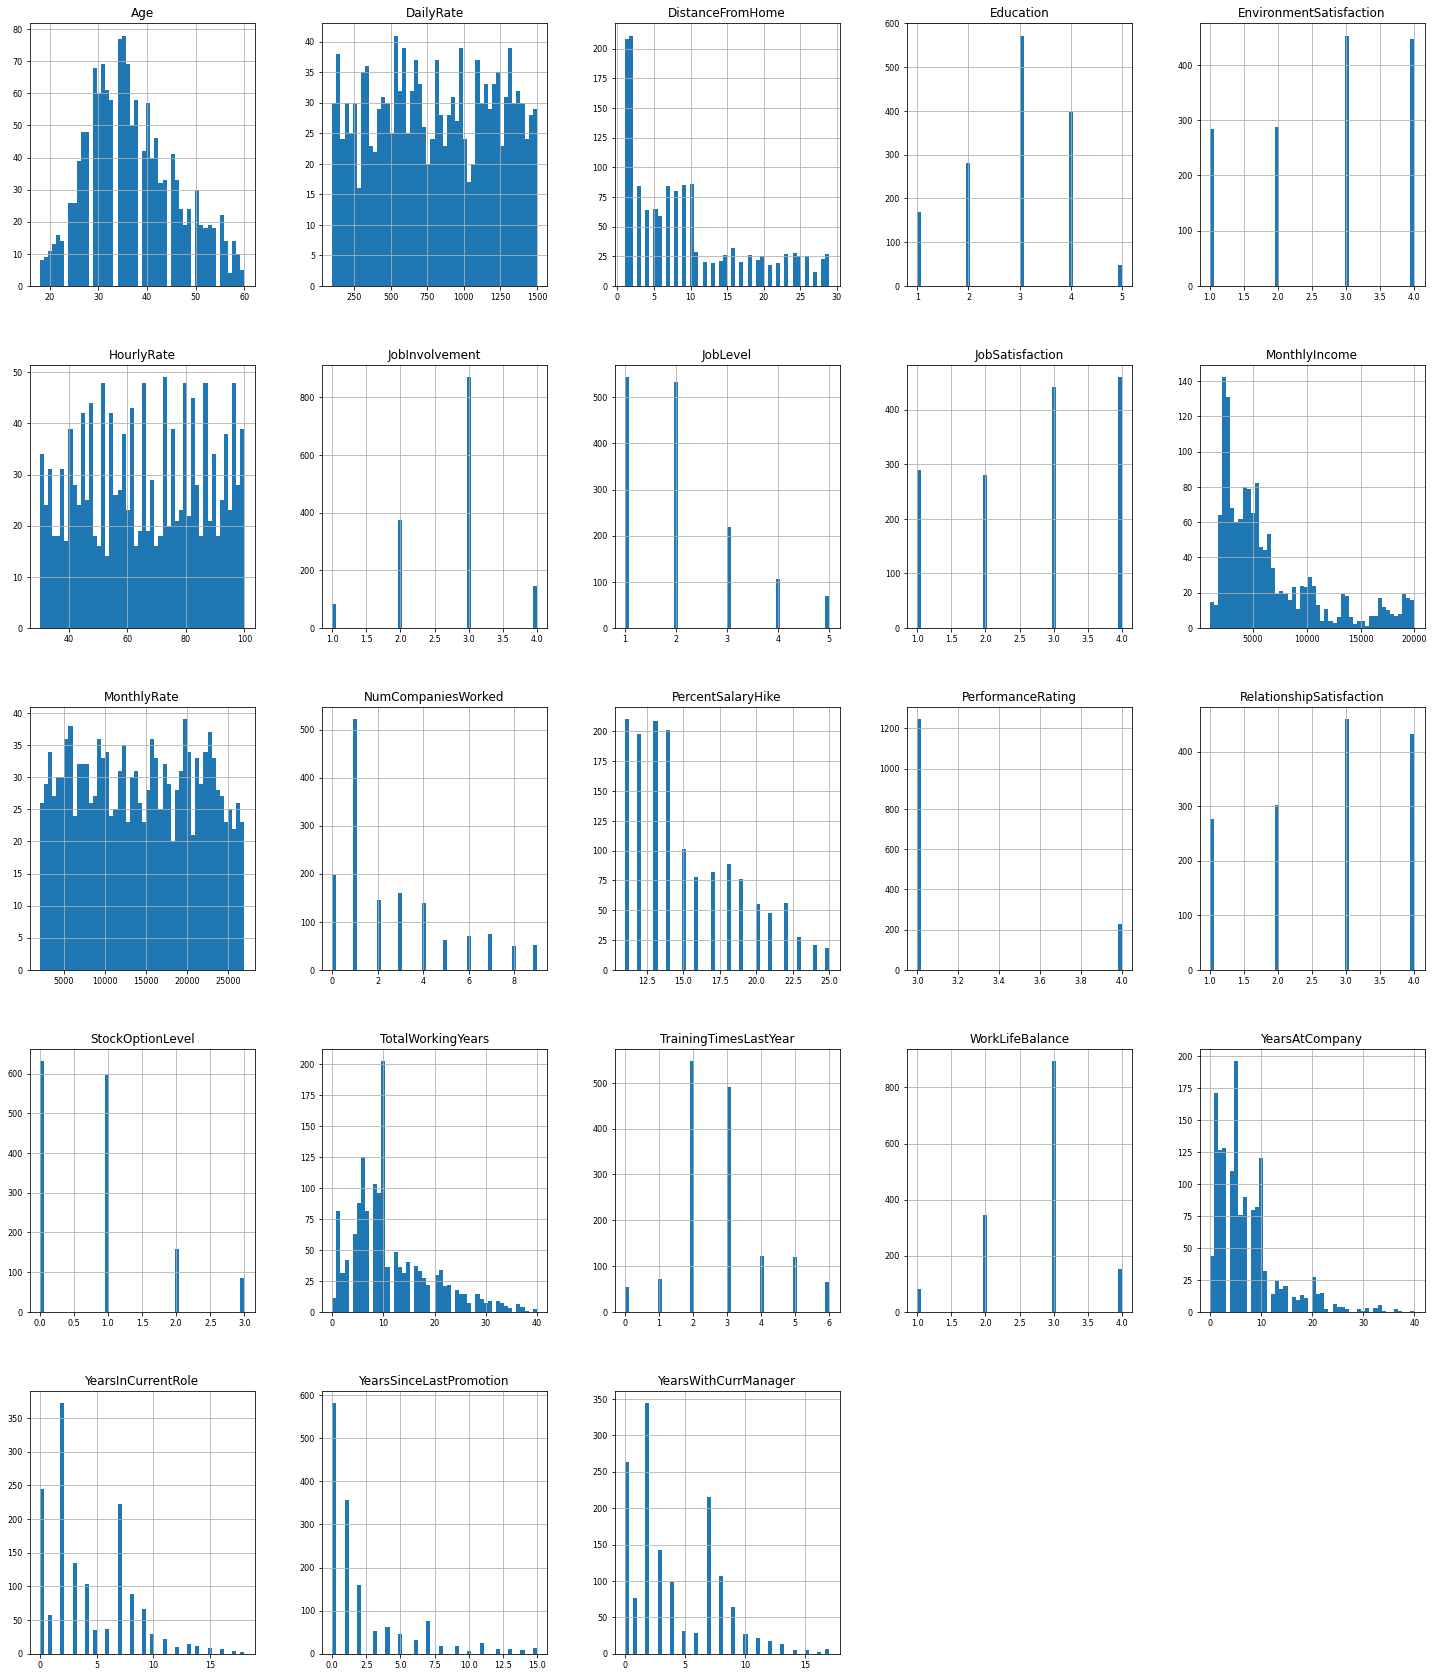

In [9]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

#### 1.2.1.3. BarPlot

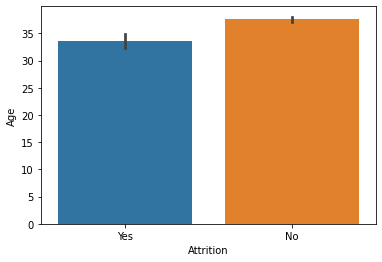

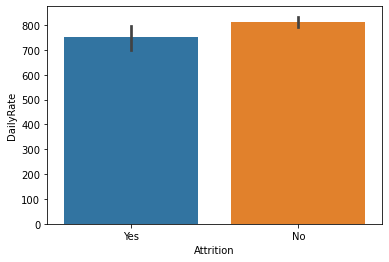

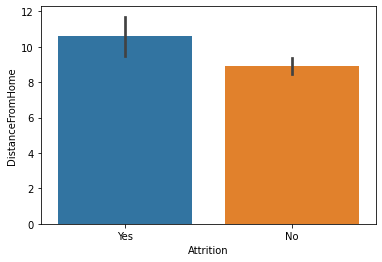

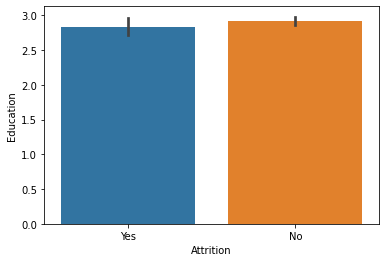

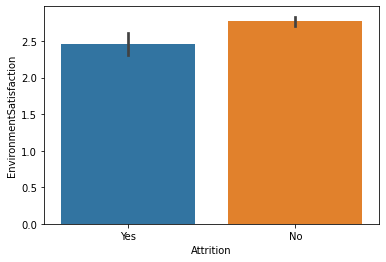

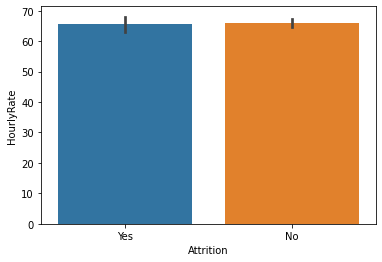

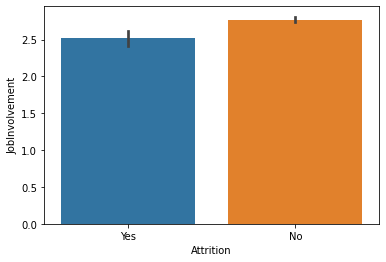

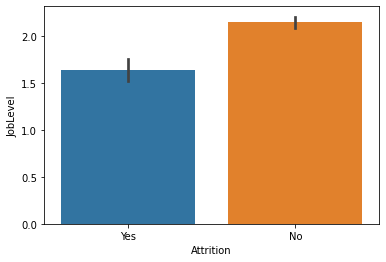

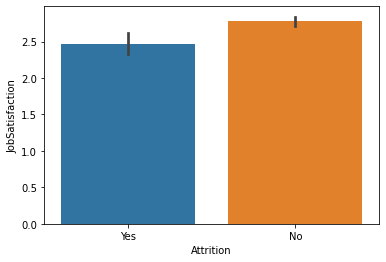

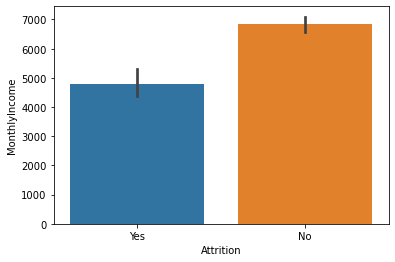

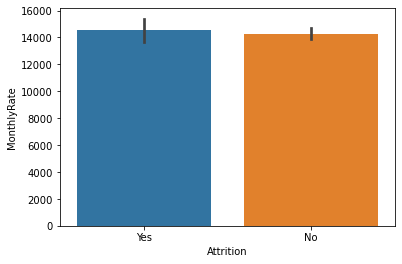

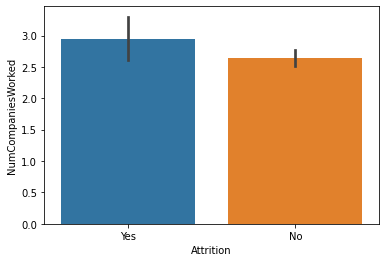

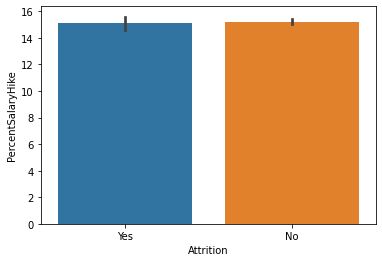

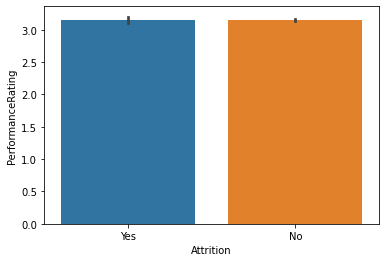

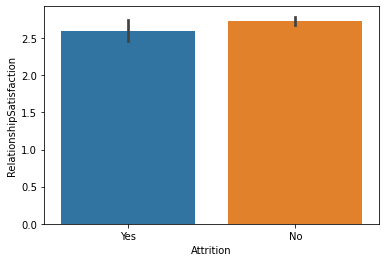

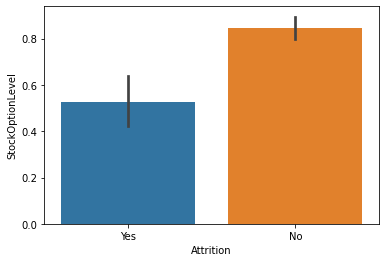

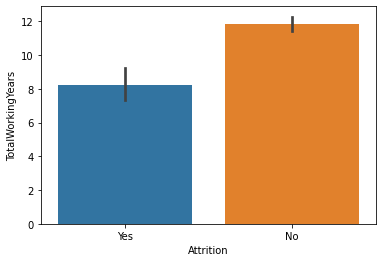

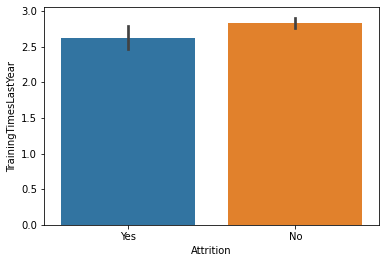

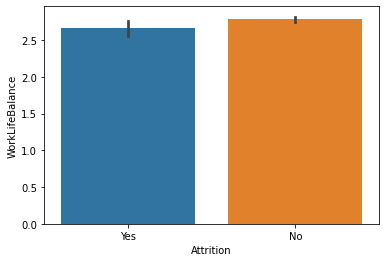

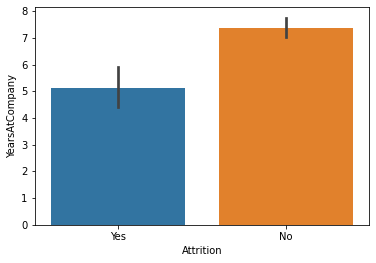

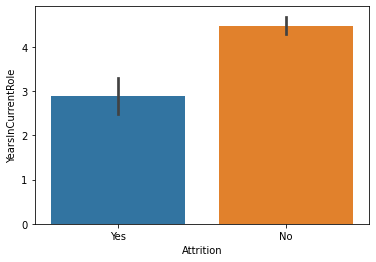

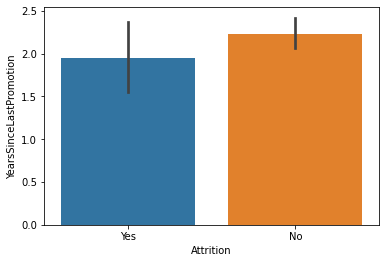

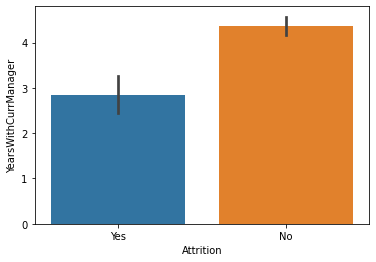

In [10]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = data['Attrition'])
    plt.show()

#### 1.2.1.4. Checking for outliers

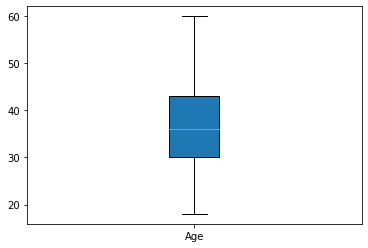

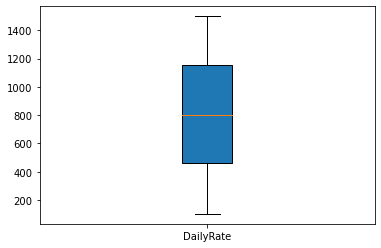

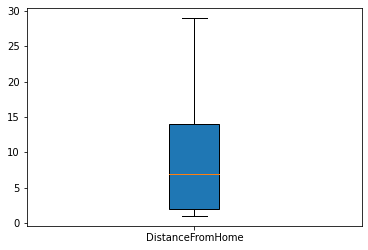

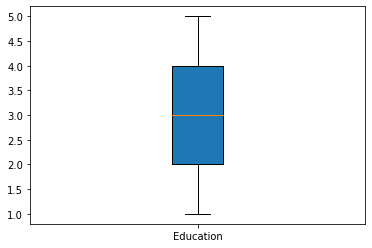

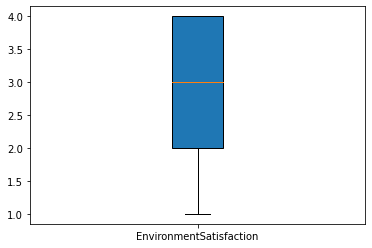

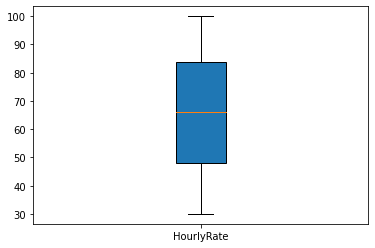

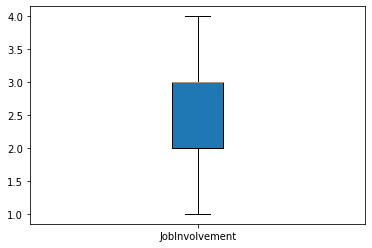

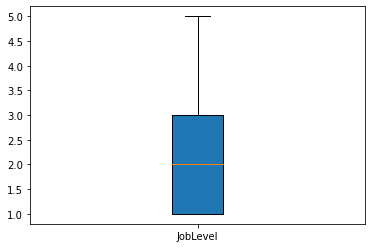

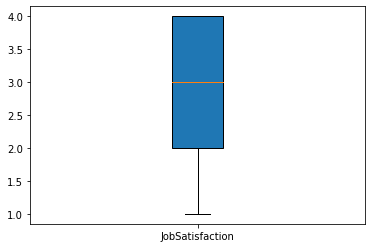

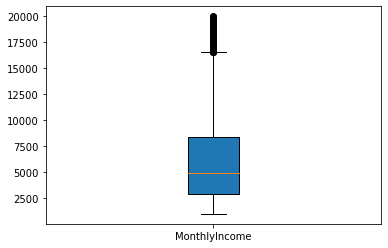

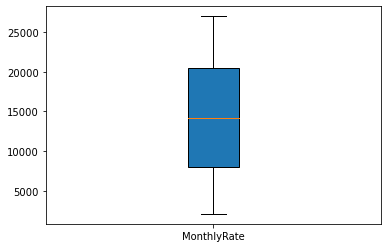

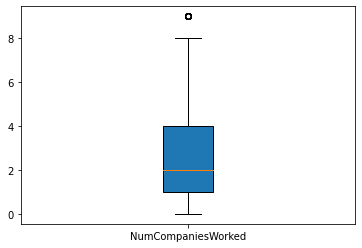

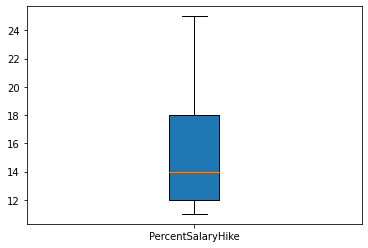

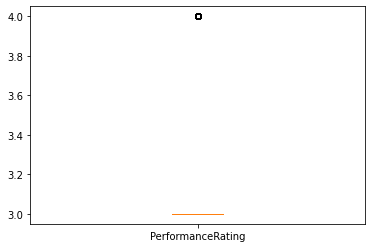

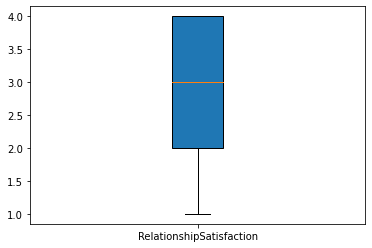

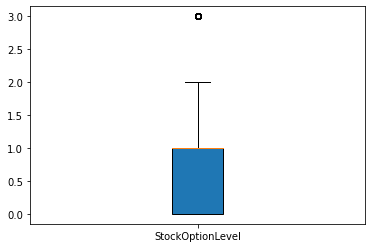

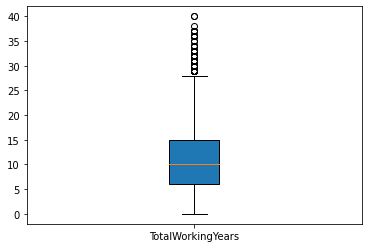

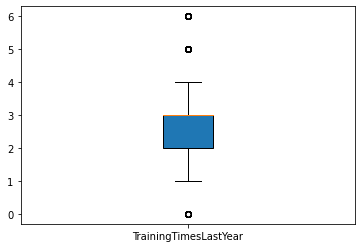

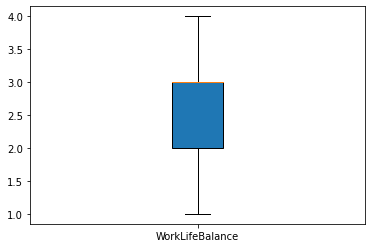

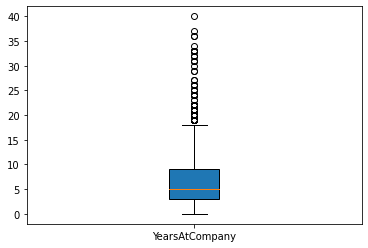

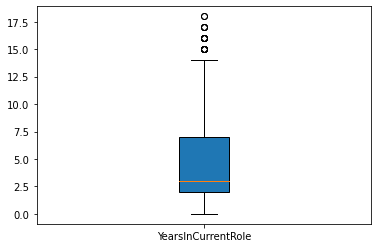

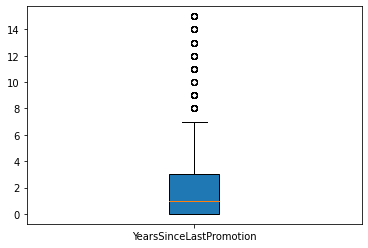

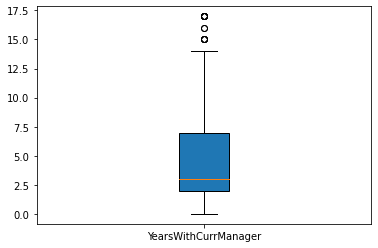

In [11]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i], patch_artist=True)
    plt.show()

#### patch_artist will show colour inside boxplot. by default it is false so no colour is shown.

#### Some variables may show outliers here in the boxplot but actually have a meaningful reason for their presence.
#### So, we will treat outliers only for necessary variable based on our domain understanding.

In [12]:
a = ['MonthlyIncome','NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurrentRole', 
     'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [13]:
type(a)

list

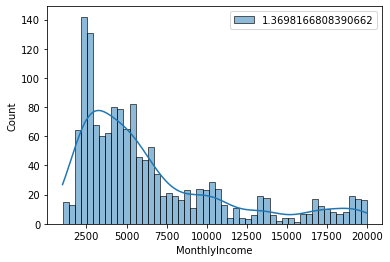

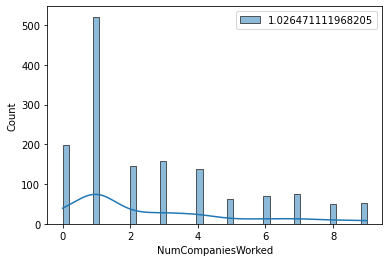

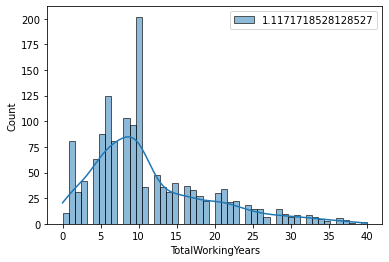

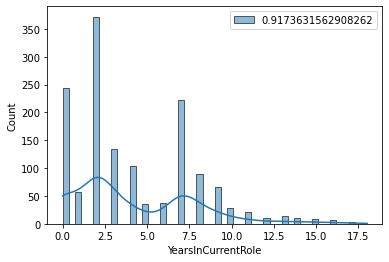

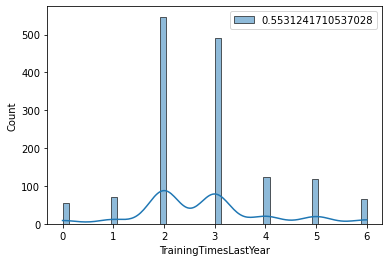

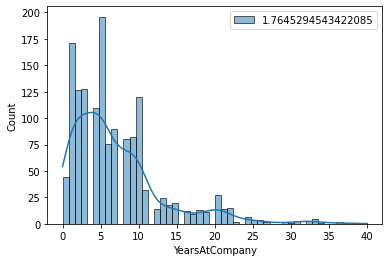

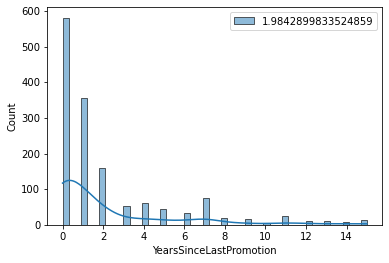

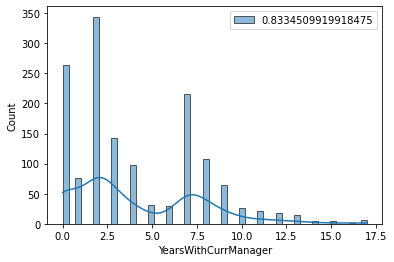

In [14]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

### Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right.
A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

### .skew() function return unbiased skew over requested axis Normalized by N-1
#### A legend is an area describing the elements of the graph.

In [15]:
out_vars = ['MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 
            'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsWithCurrManager']

### now i created a function for the treatment of outliers--

In [16]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

#### .clip() is used to trim values at specified input threshold. We can use this function to put a lower limit and upper limit on the values that any cell can have in the dataframe

In [17]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars] 

,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager
0,5993,8.0,0.5,6,0.0,4.0,5.0
1,5130,10.0,3.0,10,1.0,7.0,7.0
2,2090,7.0,3.0,0,0.0,0.0,0.0
3,2909,8.0,3.0,8,3.0,7.0,0.0
4,3468,6.0,3.0,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...
1465,2571,17.0,3.0,5,0.0,2.0,3.0
1466,9991,9.0,4.5,7,1.0,7.0,7.0
1467,6142,6.0,0.5,6,0.0,2.0,3.0
1468,5390,17.0,3.0,9,0.0,6.0,8.0


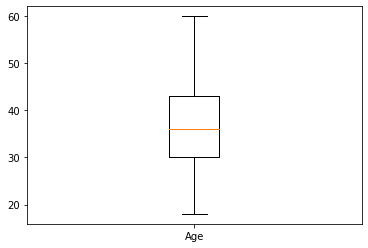

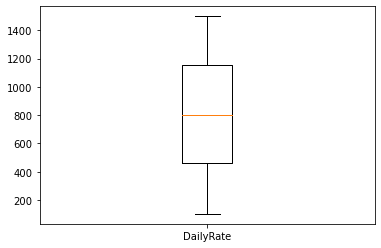

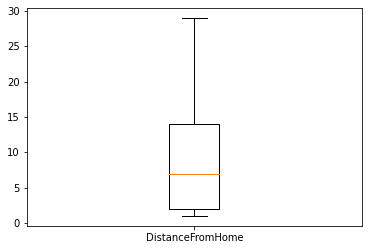

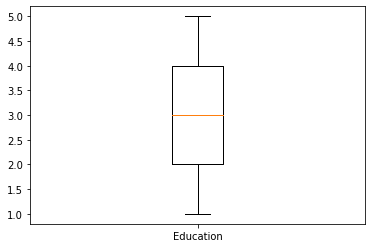

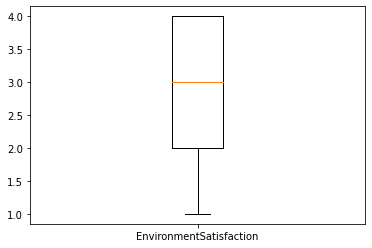

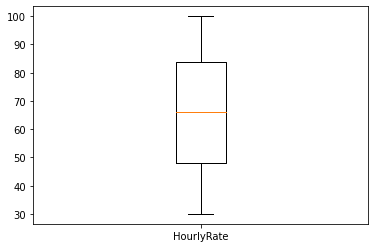

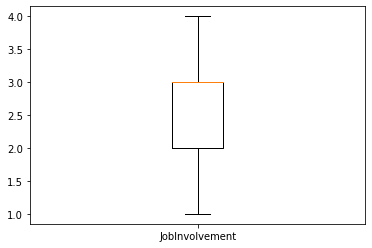

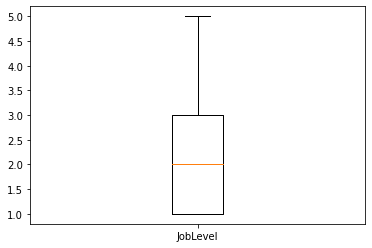

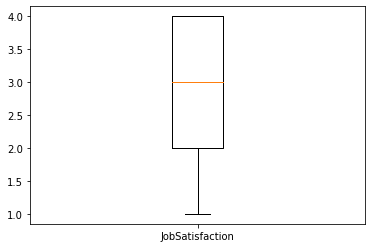

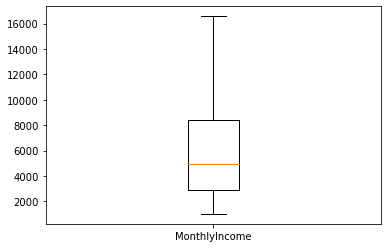

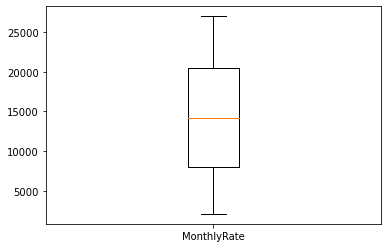

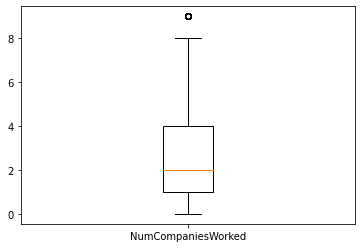

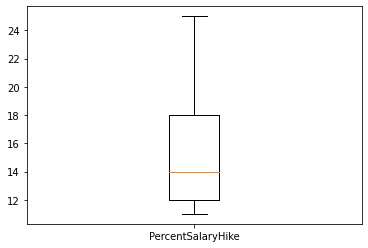

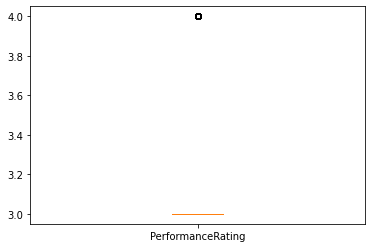

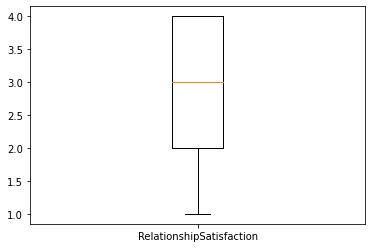

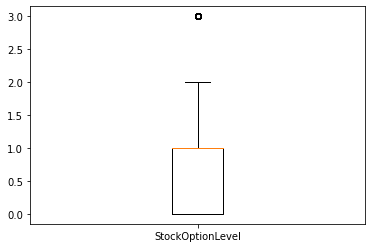

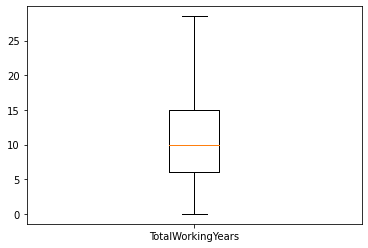

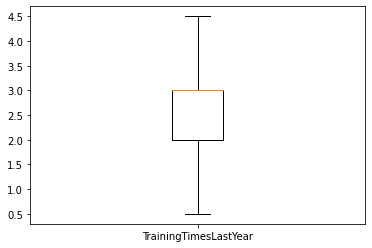

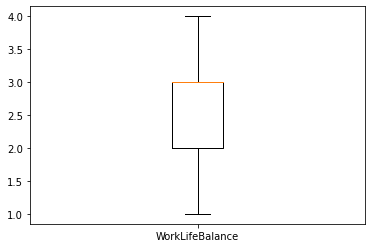

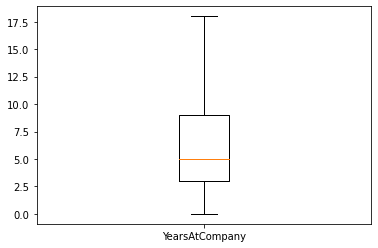

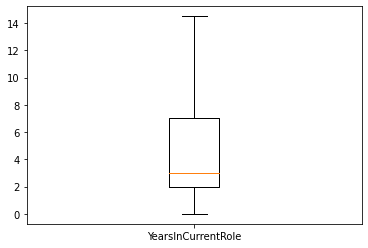

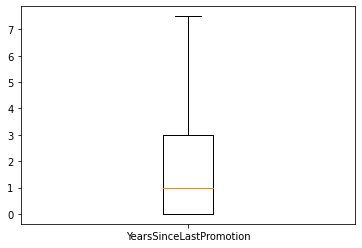

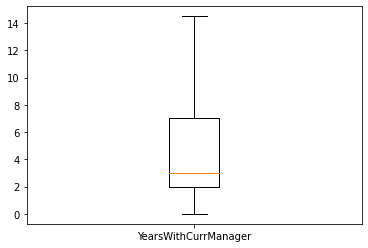

In [18]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

### 1.2.2. Missing value treatment

#### 1.2.2.1. Checking presence of missing values

In [19]:
for i in cont_data:
    print(f'{i}: {cont_data.shape[0] - cont_data[i].count()}')

Age: 0
DailyRate: 0
DistanceFromHome: 0
Education: 0
EnvironmentSatisfaction: 0
HourlyRate: 0
JobInvolvement: 0
JobLevel: 0
JobSatisfaction: 0
MonthlyIncome: 0
MonthlyRate: 0
NumCompaniesWorked: 0
PercentSalaryHike: 0
PerformanceRating: 0
RelationshipSatisfaction: 0
StockOptionLevel: 0
TotalWorkingYears: 0
TrainingTimesLastYear: 0
WorkLifeBalance: 0
YearsAtCompany: 0
YearsInCurrentRole: 0
YearsSinceLastPromotion: 0
YearsWithCurrManager: 0


#### The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m) . So Y.shape[0] is n .

**Hence, there are no missing values for Continuous variables.
Now, we plot a heatmap to visualize for multi-collinearity. However, we will be using other statistical method to remove multi-collinearity.******

<AxesSubplot:>

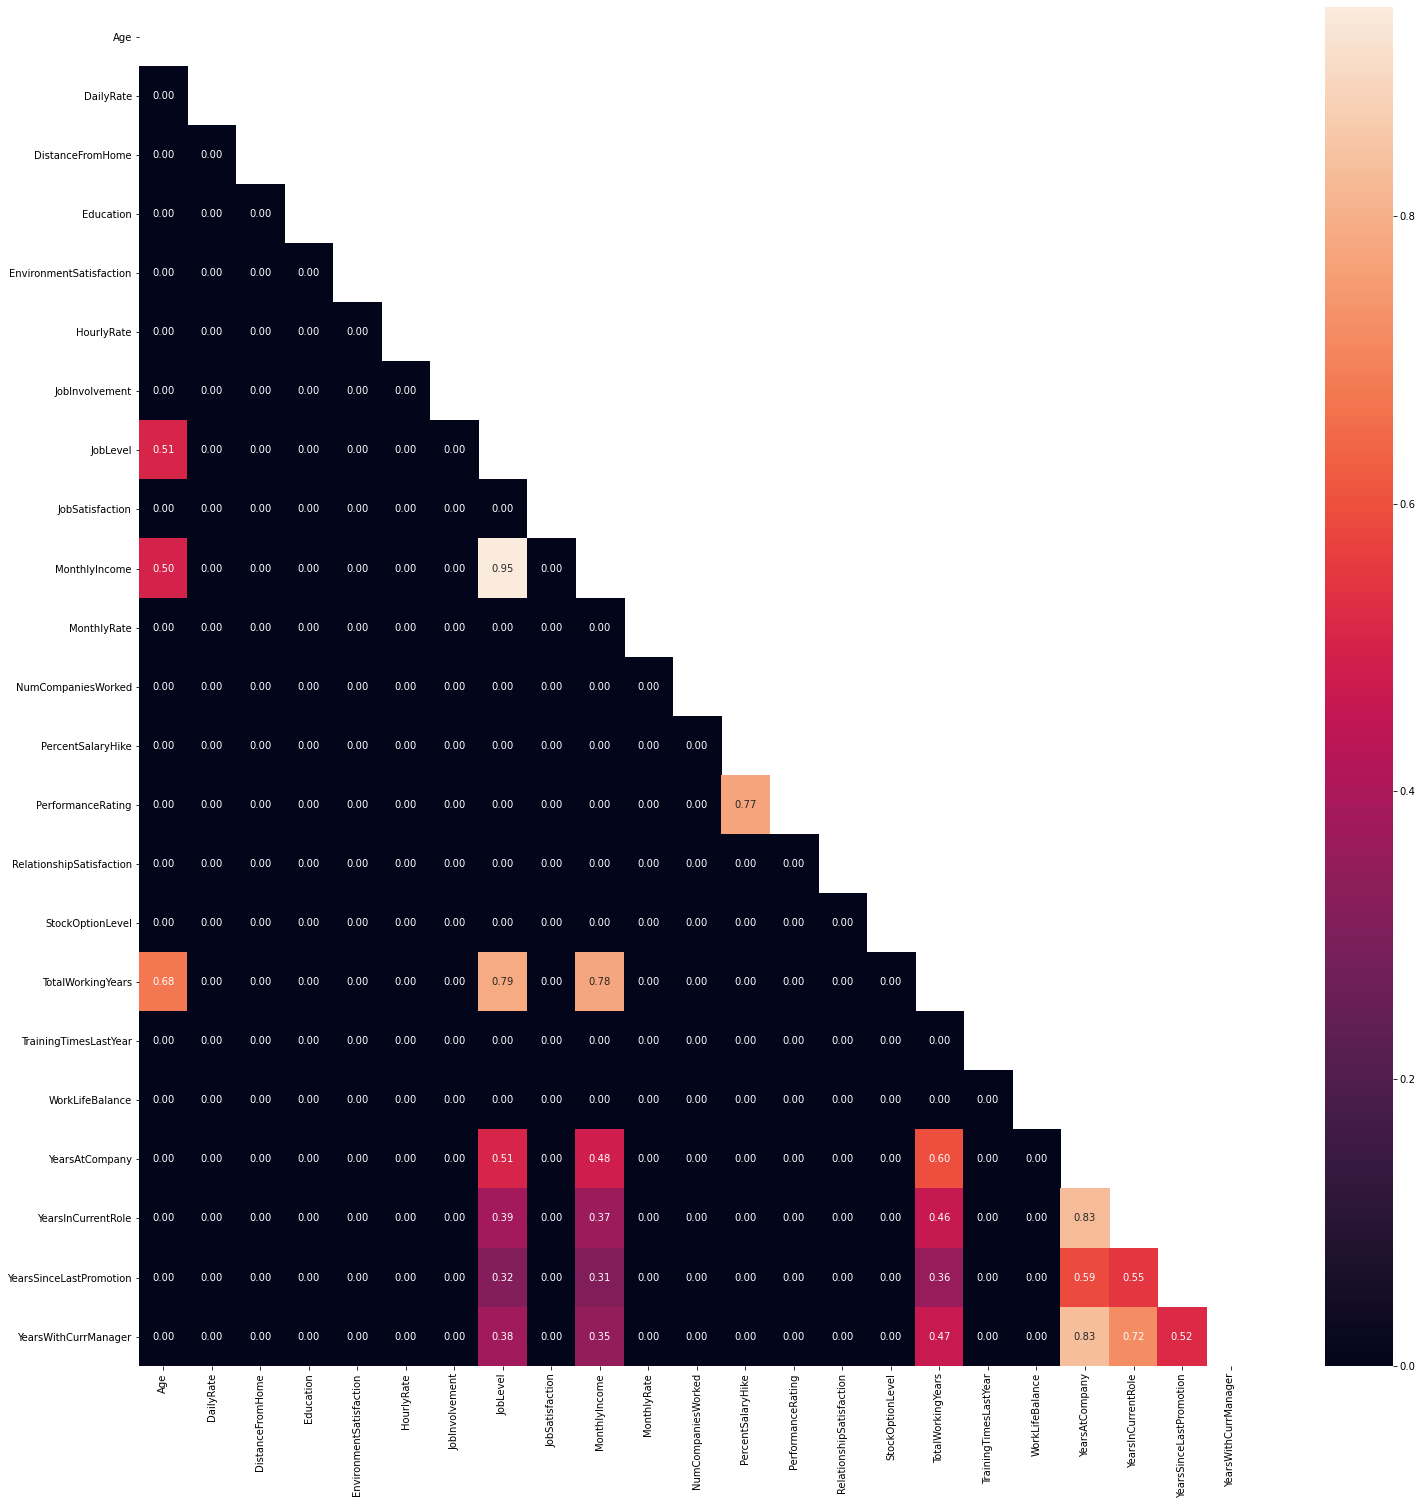

In [20]:
# Finding the correlation.
corr = cont_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

### A correlation heatmap is a rectangular representation of data and it repeats the same data description twice because the categories are repeated on both axis for computing analysis. Hence, the same result is obtained twice. A correlation heatmap that presents data only once without repetition that is categories are correlated only once is known as a triangle correlation heatmap. 

### Since data is symmetric across the diagonal from left-top to right bottom the idea of obtaining a triangle correlation heatmap is to remove data above it so that it is depicted only once. The elements on the diagonal are the parts where categories of the same type correlate.

#### We will be keeping notes of these collinear variables.
#### Later after combining the categorical variables, we'll be dropping out multi-collinearity.

---

## I.3. Categorical Featues

### 1.3.1. Exploring and Cleaning the Categorical features

#### 1.3.1.1. Extracting Categorical features

In [21]:
cat_vars = data.select_dtypes(include = ['object'])
cat_vars

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


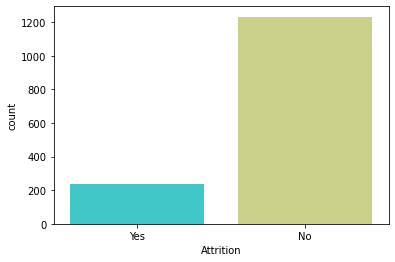

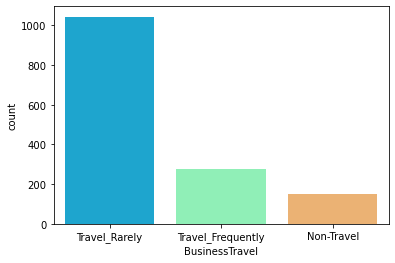

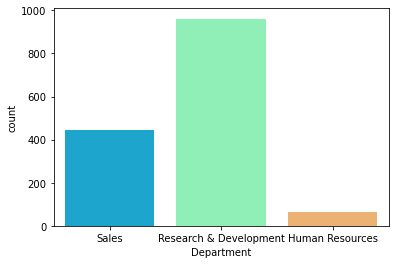

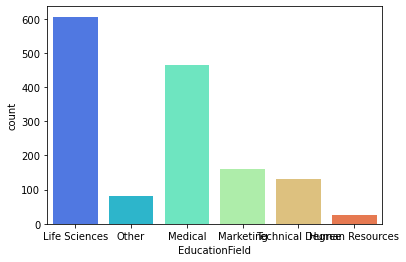

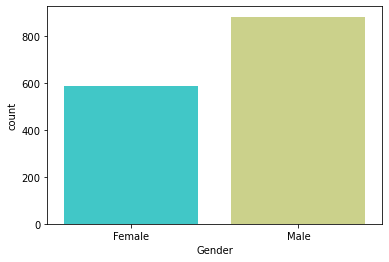

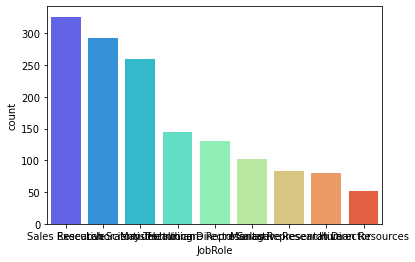

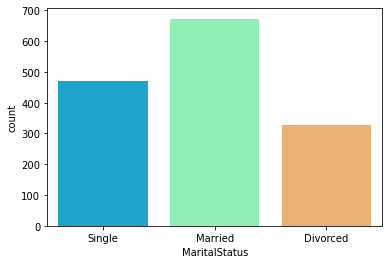

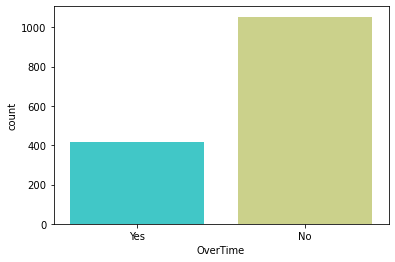

In [22]:
# Looking at the data distribution for different values.
plt.rcParams['figure.figsize'] = (6, 4)
for i in cat_vars:
    sns.countplot(x = cat_vars[i],palette="rainbow")
    plt.show()

In [23]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

No     1233
Yes     237
Name: Attrition, dtype: int64
---------

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------

Male      882
Female    588
Name: Gender, dtype: int64
---------

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
---------

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
-----

In [24]:
# The values in the features contains some special characters which are being replaced by '_'(underscore).

In [25]:
cat_vars.BusinessTravel = np.where(cat_vars.BusinessTravel == 'Non-Travel', 'Non_Travel', cat_vars.BusinessTravel)

cat_vars.Department = np.where(cat_vars.Department == 'Research & Development',
                               'Research_and_Development', cat_vars.Department)

In [26]:
def func(var):
    m = list()
    for i in var:
        x = i.split(" ")
        if len(x) > 1:
            m.append('_'.join(x))
        else:
            m.append(i)
    return m

#### split() method in Python split a string into a list of strings after breaking the given string by the specified separator. gfg

In [27]:
cat_vars = cat_vars.apply(func)
cat_vars

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life_Sciences,Female,Sales_Executive,Single,Yes
1,No,Travel_Frequently,Research_and_Development,Life_Sciences,Male,Research_Scientist,Married,No
2,Yes,Travel_Rarely,Research_and_Development,Other,Male,Laboratory_Technician,Single,Yes
3,No,Travel_Frequently,Research_and_Development,Life_Sciences,Female,Research_Scientist,Married,Yes
4,No,Travel_Rarely,Research_and_Development,Medical,Male,Laboratory_Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research_and_Development,Medical,Male,Laboratory_Technician,Married,No
1466,No,Travel_Rarely,Research_and_Development,Medical,Male,Healthcare_Representative,Married,No
1467,No,Travel_Rarely,Research_and_Development,Life_Sciences,Male,Manufacturing_Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales_Executive,Married,No


In [28]:
# Count values of different values for each variables.
for i in cat_vars:
    print(cat_vars[i].value_counts(), end = '\n---------\n\n')

No     1233
Yes     237
Name: Attrition, dtype: int64
---------

Travel_Rarely        1043
Travel_Frequently     277
Non_Travel            150
Name: BusinessTravel, dtype: int64
---------

Research_and_Development    961
Sales                       446
Human_Resources              63
Name: Department, dtype: int64
---------

Life_Sciences       606
Medical             464
Marketing           159
Technical_Degree    132
Other                82
Human_Resources      27
Name: EducationField, dtype: int64
---------

Male      882
Female    588
Name: Gender, dtype: int64
---------

Sales_Executive              326
Research_Scientist           292
Laboratory_Technician        259
Manufacturing_Director       145
Healthcare_Representative    131
Manager                      102
Sales_Representative          83
Research_Director             80
Human_Resources               52
Name: JobRole, dtype: int64
---------

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

### 1.3.2. Handling Missing values.

#### 1.3.2.1. Looking for presense of missing values.

In [29]:
cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


#### There are no null values. So no need to worry about it. If null values were present, use mode imputation.

### 1.3.3. Transforming categorical variables.

#### 1.3.3.1. Creating Dummies for Categorical variables.

In [30]:
cat_data = cat_vars.copy()

In [31]:
cat_data = pd.get_dummies(cat_data, drop_first = True)
# cat_data.drop(['Attrition_No'], axis = 1, inplace = True)

<AxesSubplot:>

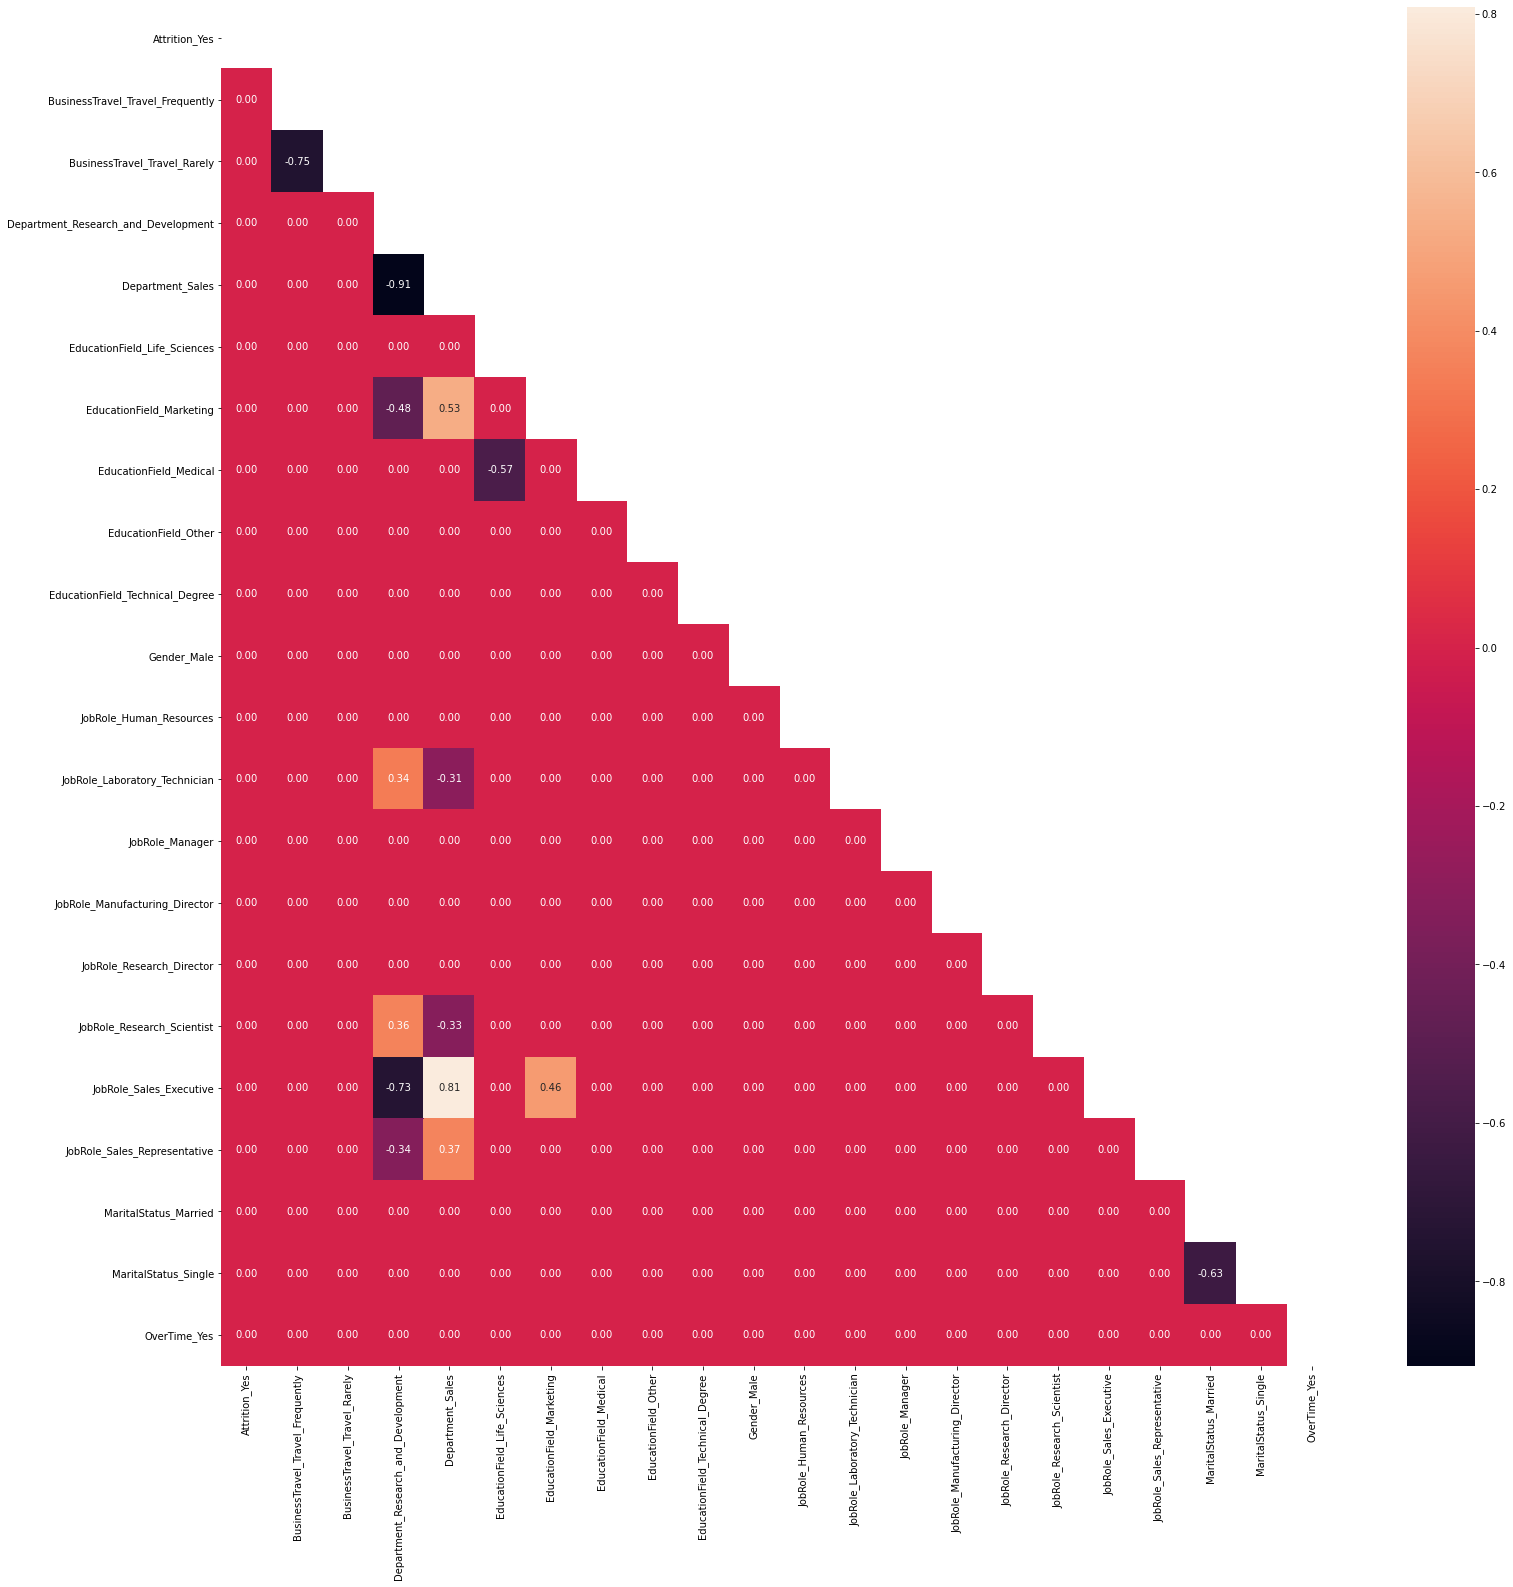

In [32]:
# Finding the correlation.
corr = cat_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

### I.4. Merging numerical and categorical variables.

In [33]:
# Combining Numerical and Categorical data.
final_data = pd.concat([cont_data, cat_data], axis = 1)

In [34]:
final_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_and_Development,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,Gender_Male,JobRole_Human_Resources,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8.0,0.5,1,6,4.0,0.0,5.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10.0,3.0,3,10,7.0,1.0,7.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7.0,3.0,3,0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8.0,3.0,3,8,7.0,3.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6.0,3.0,3,2,2.0,2.0,2.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

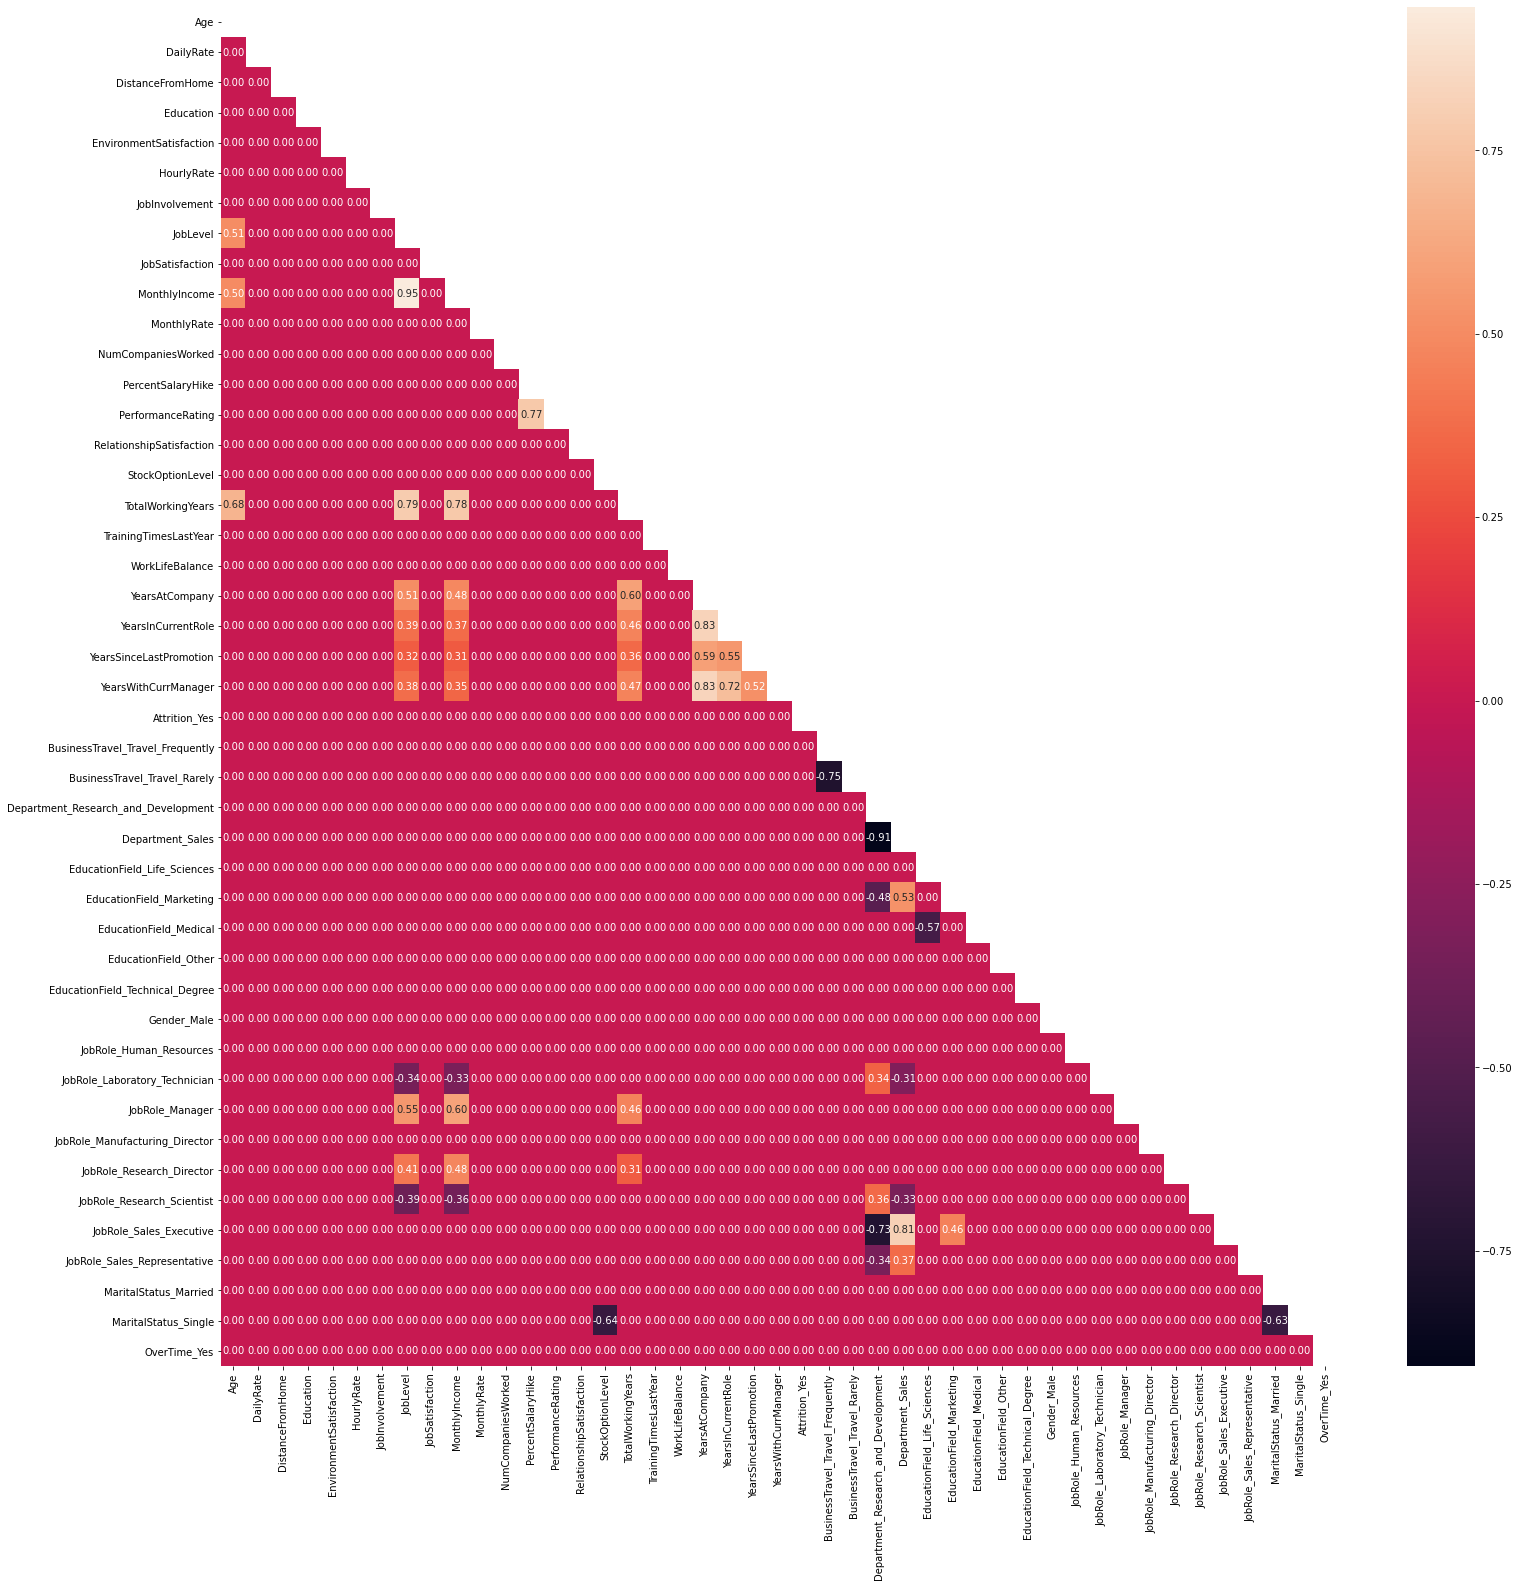

In [35]:
# Finding the correlation.
corr = final_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

# Feature Engineering and Feature Selection (Finding and dropping multi-collinear varibles)

### For classification based problems, we can either use VIF or Somers'D for finding the important varibles for the model.
### VIF helps to decrease multi-collinearity, whereas Somers'D helps to find the variable that increases the predictive power of my model.

In [36]:
# Importing packages for discovering muti-collinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#### What is Patsy in Python?
#### patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices.

# VIF

In [37]:
# Separating X features from dataset and creating a model-parameter for statistical model building.
feature_columns = final_data.columns.difference(['Attrition_Yes'])
model_params = 'Attrition_Yes ~ ' + ' + '.join(feature_columns)
model_params

'Attrition_Yes ~ Age + BusinessTravel_Travel_Frequently + BusinessTravel_Travel_Rarely + DailyRate + Department_Research_and_Development + Department_Sales + DistanceFromHome + Education + EducationField_Life_Sciences + EducationField_Marketing + EducationField_Medical + EducationField_Other + EducationField_Technical_Degree + EnvironmentSatisfaction + Gender_Male + HourlyRate + JobInvolvement + JobLevel + JobRole_Human_Resources + JobRole_Laboratory_Technician + JobRole_Manager + JobRole_Manufacturing_Director + JobRole_Research_Director + JobRole_Research_Scientist + JobRole_Sales_Executive + JobRole_Sales_Representative + JobSatisfaction + MaritalStatus_Married + MaritalStatus_Single + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime_Yes + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager'

In [38]:
y, X = dmatrices(model_params, final_data, return_type = 'dataframe')

#### patsy.dmatrix    Construct a single design matrix given a formula_like and data.
#### patsy.dmatrices(formula_like, data, return_type)  Construct two design matrices given a formula_like and data.
#### This function is identical to dmatrix(), except that it requires (and returns) two matrices instead of one. By convention, the first matrix is the “outcome” or “y” data, and the second is the “predictor” or “x” data.




####  What is design matrix in machine learning?
####  Design matrix: A collection of feature vectors for different data points constitutes a design matrix. Each row of the matrix is one data point (i.e., one feature vector), and each column represents the values of a given feature across all of the data points

In [39]:
# Finding the VIF values and creating a dataframe to store these values corresponding to features name.
mul = pd.DataFrame()
mul['Features'] = X.columns

mul['VIF_values'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
mul

,Features,VIF_values
0,Intercept,448.041267
1,Age,2.078415
2,BusinessTravel_Travel_Frequently,2.371421
3,BusinessTravel_Travel_Rarely,2.376512
4,DailyRate,1.035259
5,Department_Research_and_Development,43.807137
6,Department_Sales,44.030193
7,DistanceFromHome,1.022170
8,Education,1.083661
9,EducationField_Life_Sciences,24.108393


In [40]:
# Finding the variables based on the cut-off value for VIF.
# Theoretically, the value should be more than 5 but practically it is taken as more than 4.
# However, any value (4 or 5) is correct based on the business problems.

f_data = mul[mul.VIF_values > 5].reset_index(drop = True)
f_data

,Features,VIF_values
0,Intercept,448.041267
1,Department_Research_and_Development,43.807137
2,Department_Sales,44.030193
3,EducationField_Life_Sciences,24.108393
4,EducationField_Marketing,10.890307
5,EducationField_Medical,21.650148
6,EducationField_Other,6.043304
7,EducationField_Technical_Degree,8.876363
8,JobLevel,11.890566
9,JobRole_Human_Resources,7.231000


<AxesSubplot:>

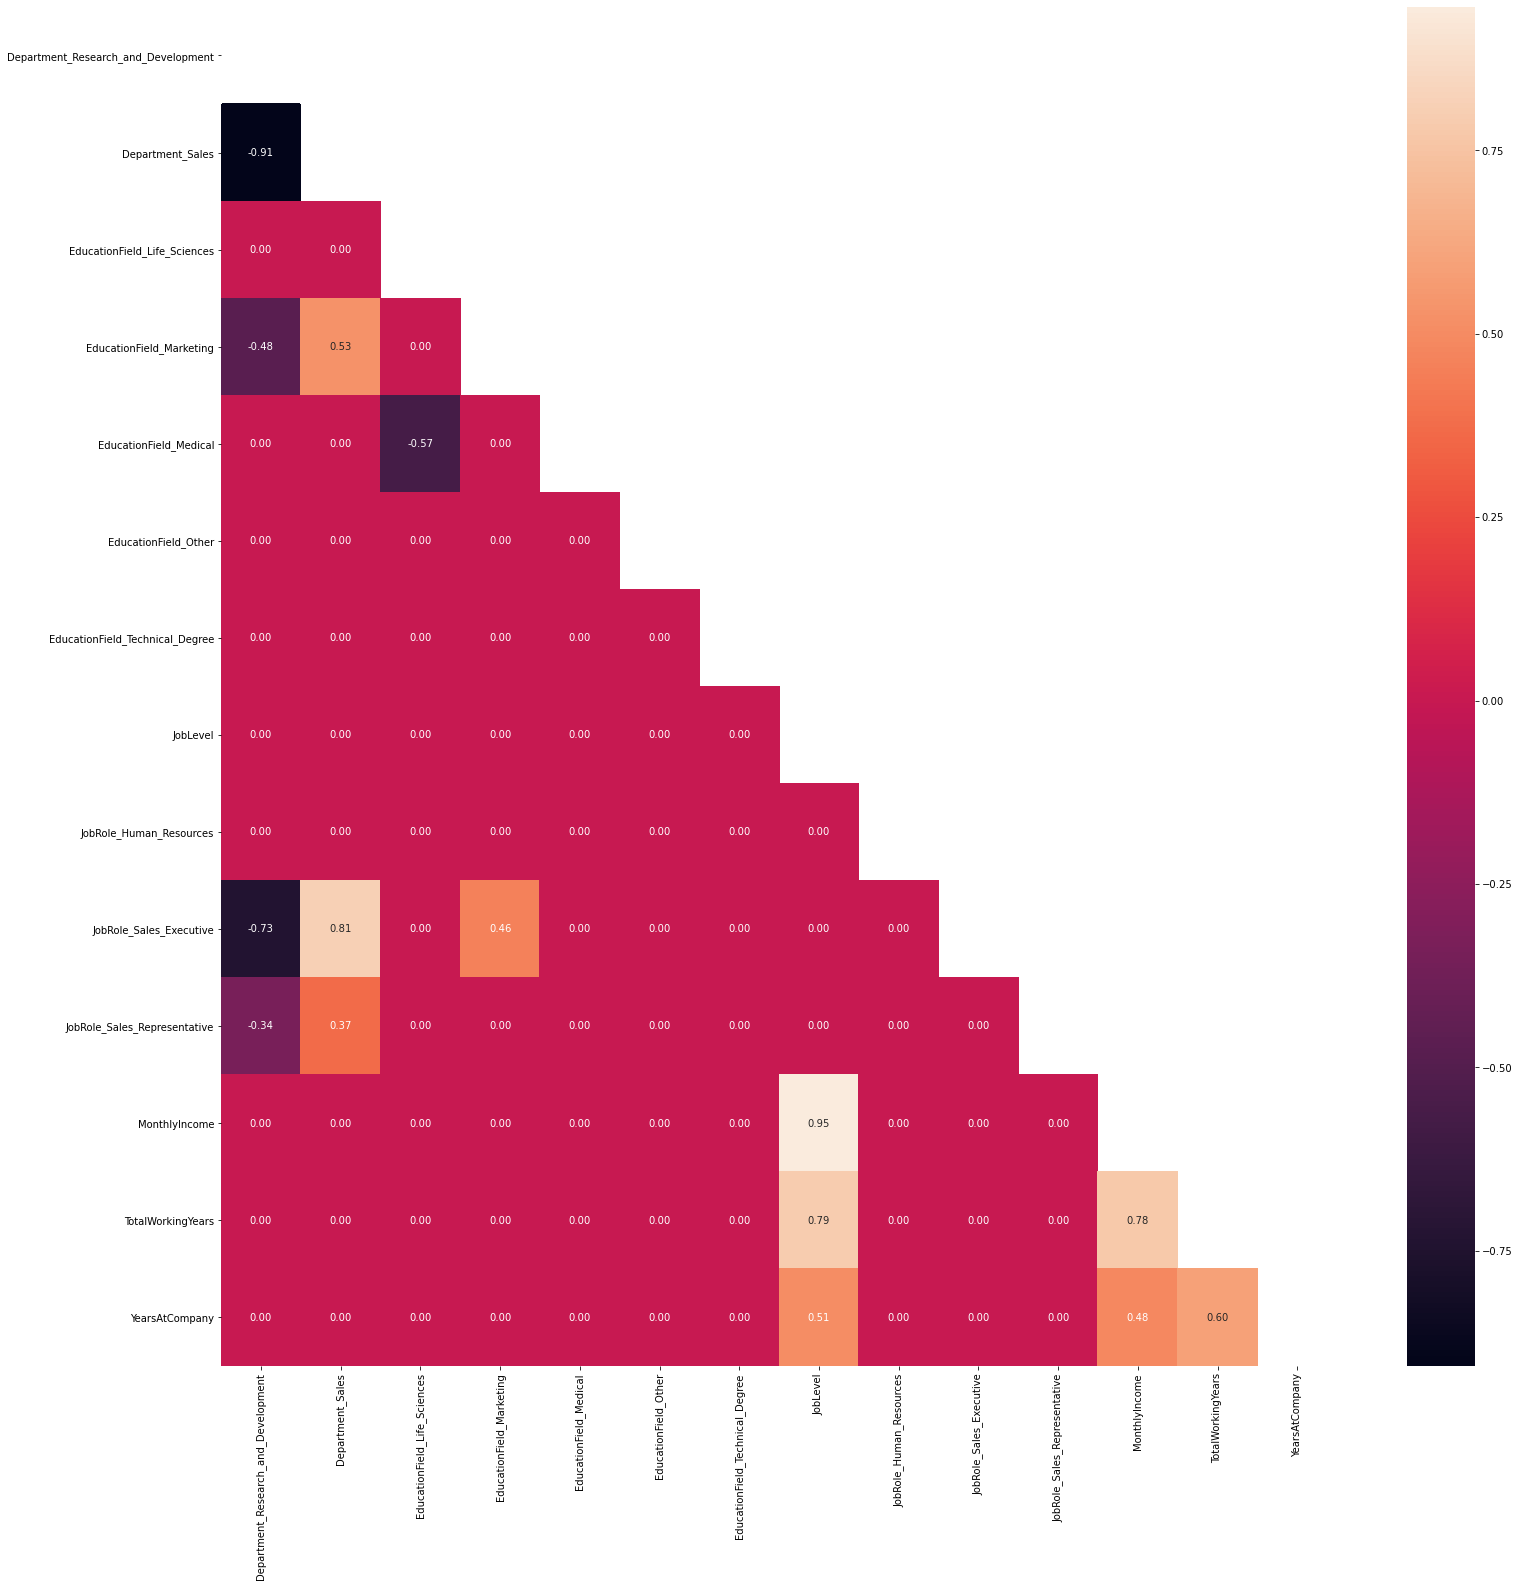

In [41]:
# Finding the correlation.
corr = final_data[f_data.Features[1:]].corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

### We can either use VIF or Somers Delta method for feature engineering and feature selection.
### In vif we have to remove the columns having vif above 5(cut off value) and so we drop f_data from our final data and then use that data for modelling.

## Somers' D Score

#### refer https://www.statisticshowto.com/somers-d/

In [42]:
# Separating X features from dataset and creating a model-parameter for statistical model building.
feature_columns = final_data.columns.difference(['Attrition_Yes'])
feature_columns

Index(['Age', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'DailyRate',
       'Department_Research_and_Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Life_Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical_Degree',
       'EnvironmentSatisfaction', 'Gender_Male', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole_Human_Resources',
       'JobRole_Laboratory_Technician', 'JobRole_Manager',
       'JobRole_Manufacturing_Director', 'JobRole_Research_Director',
       'JobRole_Research_Scientist', 'JobRole_Sales_Executive',
       'JobRole_Sales_Representative', 'JobSatisfaction',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime_Yes',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears

In [43]:
# Finding out the Somers'D value foreach variables.
col = list()
score = list()
for i in feature_columns:
    model_params = f'Attrition_Yes ~ {i}'
    log_reg = smf.logit(model_params, final_data).fit()
    somersD = 2 * metrics.roc_auc_score(final_data['Attrition_Yes'], log_reg.predict(final_data)) - 1   
    col.append(i)
    score.append(somersD)

Optimization terminated successfully.
         Current function value: 0.428257
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.435639
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438156
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438541
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441156
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440252
  

In [44]:
# Making a dataframe for Somers'D score for different variables.
som = {'Column_name' : col,
        'SomersD_value' : score}
f_vars = pd.DataFrame(som)
f_vars

,Column_name,SomersD_value
0,Age,0.268643
1,BusinessTravel_Travel_Frequently,0.122445
2,BusinessTravel_Travel_Rarely,0.061156
3,DailyRate,0.089443
4,Department_Research_and_Development,0.110351
5,Department_Sales,0.101081
6,DistanceFromHome,0.123982
7,Education,0.045513
8,EducationField_Life_Sciences,0.043775
9,EducationField_Marketing,0.047112


In [45]:
# Taking the cut-off value for Somers'D as 0.1
f_vars1 = f_vars[f_vars.SomersD_value >= 0.1]

In [46]:
print(len(f_vars1.Column_name))
f_vars1.Column_name

19


0                                     Age
1        BusinessTravel_Travel_Frequently
4     Department_Research_and_Development
5                        Department_Sales
6                        DistanceFromHome
13                EnvironmentSatisfaction
16                         JobInvolvement
17                               JobLevel
19          JobRole_Laboratory_Technician
26                        JobSatisfaction
27                  MaritalStatus_Married
28                   MaritalStatus_Single
29                          MonthlyIncome
32                           OverTime_Yes
36                       StockOptionLevel
37                      TotalWorkingYears
40                         YearsAtCompany
41                     YearsInCurrentRole
43                   YearsWithCurrManager
Name: Column_name, dtype: object

In [47]:
# Taking the cut-off value for Somers'D as 0.2
f_vars2 = f_vars[f_vars.SomersD_value >= 0.2]

In [48]:
print(len(f_vars2.Column_name))
f_vars2.Column_name

10


0                      Age
17                JobLevel
28    MaritalStatus_Single
29           MonthlyIncome
32            OverTime_Yes
36        StockOptionLevel
37       TotalWorkingYears
40          YearsAtCompany
41      YearsInCurrentRole
43    YearsWithCurrManager
Name: Column_name, dtype: object

Ideally the cut-off value for Somers'D score should be greater than 0.2 but when we use this cut-off value, thw number of variables become very less. Thus, we use 0.1 kepping in mind that this may result in some prediction error.

# Modelling

#### from    sklearn.model_selection    import train_test_split, GridSearchCV
#### from    sklearn.feature_selection  import RFE
#### from    sklearn.linear_model       import LogisticRegression
#### from    sklearn                    import metrics
#### import  statsmodels.formula.api    as smf

#### (Already done above in importing necessary packages)

In [49]:
Model = list()
Accuracy = list()
AUC_score = list()

## ML Models

In [50]:
# Separating dependent and independent variables from final_data on the basis of Somers'D score
X = final_data[f_vars1.Column_name]
y = final_data['Attrition_Yes']

In [51]:
X.shape, y.shape

((1470, 19), (1470,))

In [52]:
# Train-Test split for building ML models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 19), (441, 19), (1029,), (441,))

### 1. ML based Logistic Regression

In [54]:
Model.append('ML_Log_reg')
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [55]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8798185941043084

In [56]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, log_reg.predict(X_test))
AUC_score.append(auc)
auc

0.6550258843830888

### 2. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.
param_grid = {'max_depth' : range(2, 15)}

tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, n_jobs = -1, verbose = 1)
tree_clf.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15)}, verbose=1)

In [59]:
tree_clf.best_params_

{'max_depth': 3}

In [60]:
# Creating the model using best estimator after CV.
Model.append('DTree')
tree_clf = tree_clf.best_estimator_

In [61]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, tree_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8775510204081632

In [62]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, tree_clf.predict(X_test))
AUC_score.append(auc)
auc

0.6193054357204487

### 3. Random Forest

In [63]:
from sklearn import ensemble as en

In [64]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80, 90, 100], 
                 'max_features' : range(2, 15)}

rf_clf = en.RandomForestClassifier()
rf_clf = GridSearchCV(rf_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
             scoring='roc_auc', verbose=1)

In [65]:
rf_clf.best_params_

{'max_features': 6, 'n_estimators': 80}

In [66]:
# Creating the model using best estimator after CV.
Model.append('RForest')
rf_clf = rf_clf.best_estimator_

In [67]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, rf_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.8843537414965986

In [68]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, rf_clf.predict(X_test))
AUC_score.append(auc)
auc

0.6576574633304573

### 4. Gradient Boosting

In [69]:
# Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

param_grid = {'n_estimators' : [40, 50, 60, 70, 80, 90, 100, 110, 120, 130], 
#               'learning_rate' : [10 ** x for x in range(-3, 2)],
                 'max_features' : range(2, 15)}

gb_clf = en.GradientBoostingClassifier()
gb_clf = GridSearchCV(gb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
gb_clf.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 15),
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120,
                                          130]},
             scoring='roc_auc', verbose=1)

In [70]:
gb_clf.best_params_

{'max_features': 11, 'n_estimators': 110}

In [71]:
# Creating the model using best estimator after CV.
Model.append('GBoost')
gb_clf = gb_clf.best_estimator_

In [72]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, gb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

0.854875283446712

In [73]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, gb_clf.predict(X_test))
AUC_score.append(auc)
auc

0.6267903364969802

### 5. Xtreme Gradient Boosting

In [74]:
from xgboost import XGBRFClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# # Using GridSearchCv to cross-validate the model and find the value of hyper-parameters.

#param_grid = {'n_estimators' : [20, 30, 40, 50, 60, 70, 80], 
#              'learning_rate' : [10 ** x for x in range(-3, 2)]}

#xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
#xgb_clf = GridSearchCV(xgb_clf, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1)
#xgb_clf.fit(X_train, y_train)

In [ ]:
 # xgb_clf.best_params_

In [ ]:
# # Creating the model using best estimator after CV.
# Model.append('XGBoost')
# xgb_clf = xgb_clf.best_estimator_

In [ ]:
# Cross-validating wasn't giving any better output than without CV. Hence, CV was not used(done).

In [ ]:
Model.append('XGBoost')
xgb_clf = XGBRFClassifier(use_label_encoder=False, objective='reg:squarederror')
xgb_clf.fit(X_train, y_train)

In [ ]:
# Find the Accuracy score of the model.
accuracy = metrics.accuracy_score(y_test, xgb_clf.predict(X_test))
Accuracy.append(accuracy)
accuracy

In [ ]:
# Find the AUC score of the model.
auc = metrics.roc_auc_score(y_test, xgb_clf.predict(X_test))
AUC_score.append(auc)
auc

In [ ]:
# Looking at outcoems for all different models.
comp = {
    'Model' : Model,
    'AUC_score' : AUC_score,
    'Accuracy' : Accuracy
}
pd.DataFrame(comp)

# Have A Great Day.

# EOF

# ----Further improvements----

1. Use of RFE for feature elimination.
2. Handling Imbalance data Using RandomSampling, SMOTE and SMOTETomek approaches

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# rfe = RFE(DecisionTreeClassifier(random_state = 1234), n_features_to_select = 15)
# rfe.fit(X, y)

In [ ]:
# features = X.columns[rfe.support_]
# X = X[features]
# features